In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as ols


In [8]:
df = pd.read_csv("Glassdoor Gender Pay Gap.csv")
df


,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225


In [9]:
# Check for missing values and drop rows with missing values (if any)
df = df.dropna()

# Remove duplicate rows
df = df.drop_duplicates()

# Ensure data types are correct (convert columns if necessary)
# For example, if 'Age' should be an integer, ensure it's correctly typed
df['Age'] = df['Age'].astype(int)

# Handle outliers (example: remove rows with BasePay or Bonus beyond a reasonable range)
df = df[(df['BasePay'] > 0) & (df['Bonus'] > 0)]

# Standardize column names (optional, e.g., make all lowercase)
df.columns = df.columns.str.lower()

# Display the cleaned dataset
df

,jobtitle,gender,age,perfeval,education,dept,seniority,basepay,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225



Average Base Pay by Department and Gender:
gender                Female           Male
dept                                       
Administration  87071.873684   96170.744898
Engineering     90774.955056  101433.000000
Management      92679.011494   99482.297297
Operations      86456.156250   93118.438596
Sales           92867.079208  102349.481132

Two-Way ANOVA Results:
                         sum_sq     df          F        PR(>F)
C(dept)            9.317056e+09    4.0   3.759494  4.827383e-03
C(gender)          1.803225e+10    1.0  29.104529  8.580222e-08
C(dept):C(gender)  6.059093e+08    4.0   0.244488  9.130447e-01
Residual           6.133727e+11  990.0        NaN           NaN


C:\Users\haraz\AppData\Local\Temp\ipykernel_28128\3601441753.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='dept', y='basepay', hue='gender', ci=None)


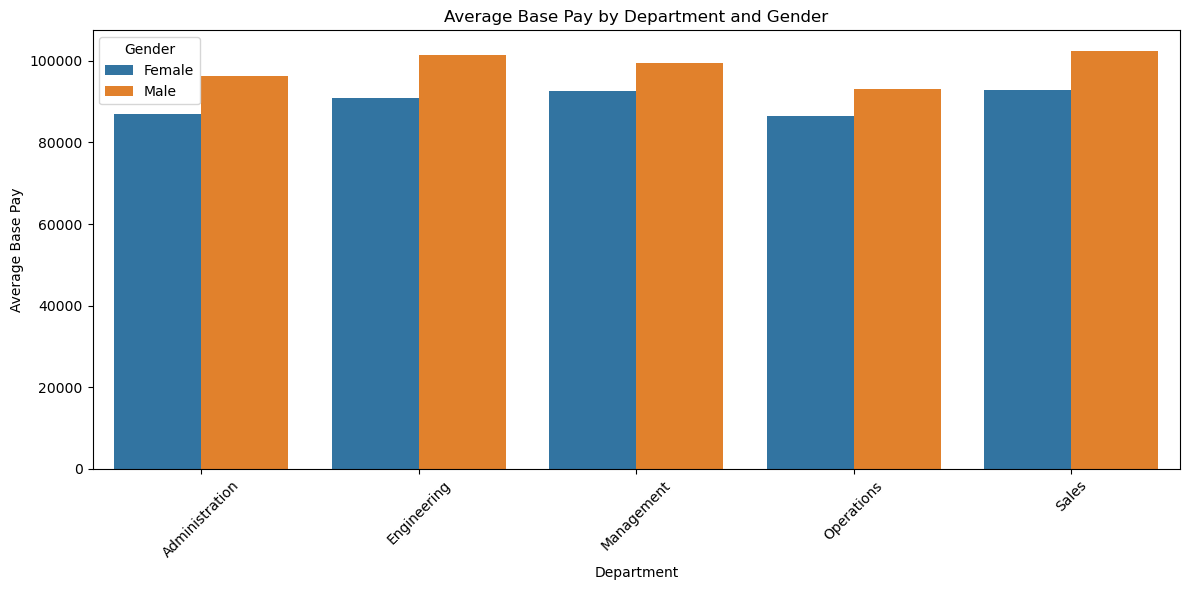

In [14]:
# Display basic group means
avg_base_pay = df.groupby(['dept', 'gender'])['basepay'].mean().unstack()
print("\nAverage Base Pay by Department and Gender:")
print(avg_base_pay)

# Perform Two-Way ANOVA
# Make sure Dept and Gender are categorical variables
df['dept'] = df['dept'].astype('category')
df['gender'] = df['gender'].astype('category')

# Build and fit the model
model = ols('basepay ~ C(dept) + C(gender) + C(dept):C(gender)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Show ANOVA results
print("\nTwo-Way ANOVA Results:")
print(anova_table)

# Visualization: Average BasePay by Department and Gender
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='dept', y='basepay', hue='gender', ci=None)
plt.title('Average Base Pay by Department and Gender')
plt.xlabel('Department')
plt.ylabel('Average Base Pay')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

